In [30]:
inpF<-file.path("/home/ash022/Raw/combined/txt/proteinGroups.txt")
data<-read.table(inpF,header=T,sep="\t")
dim(data)

[1] 34 30

In [31]:
#clean
data = data[!data$Reverse=="+",]
data = data[!data$Potential.contaminant=="+",]
data = data[!data$Only.identified.by.site=="+",]
print("Removed Reverse,Potential.contaminant and Only.identified.by.site")
dim(data)
row.names(data)<-data$Fasta.headers
print("Converted Fasta.headers to rownames")
#summary(data)

[1] "Removed Reverse,Potential.contaminant and Only.identified.by.site"


[1] 34 30

Warning message:
“non-unique values when setting 'row.names': ”


ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


In [21]:
#select
selection="Intensity"
log2LFQ<-log2(as.matrix(data[,grep(selection,colnames(data))]))
print(paste("Selected and log2 transformed columns",selection))
log2LFQ[log2LFQ==-Inf]=0
colnames(log2LFQ)=sub(selection,"",colnames(log2LFQ))
dim(log2LFQ)
summary(log2LFQ)
#rowsum(s)
Sums<-rowSums(log2LFQ)
#extract-uniprot-id(s)
Uniprot<-sapply(strsplit(row.names(log2LFQ),";"), `[`, 1)
uniprot<-sapply(strsplit(Uniprot,"|",fixed=TRUE),`[`, 2)

[1] "Selected and log2 transformed columns Intensity"


[1] 34  1

       V1       
 Min.   : 0.00  
 1st Qu.:21.14  
 Median :23.32  
 Mean   :19.97  
 3rd Qu.:24.77  
 Max.   :36.12  

ERROR: Error in strsplit(row.names(log2LFQ), ";"): non-character argument


In [22]:
#write-csv
outF=paste(inpF,selection,"log2","csv",sep = ".")
write.csv(cbind(log2LFQ,Sums,uniprot),outF)
print(paste("Log2 transform of",selection,"columns written to",outF))


[1] "Log2 transform of Intensity columns written to /home/ash022/Raw/combined/txt/proteinGroups.txt.Intensity.log2.csv"


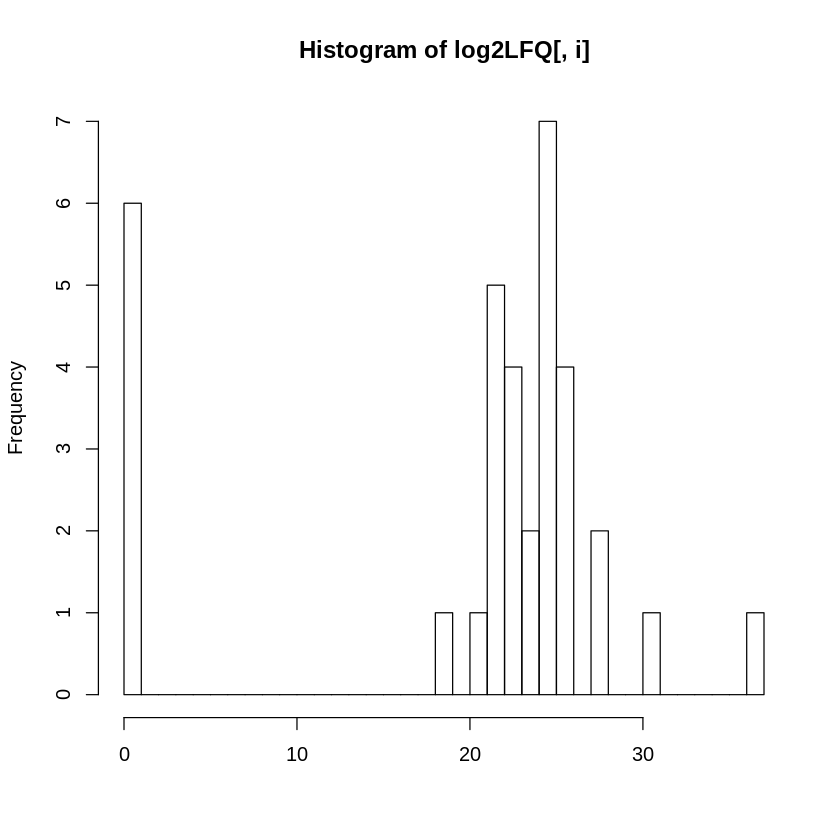

ERROR: Error in scores[, choices]: subscript out of bounds


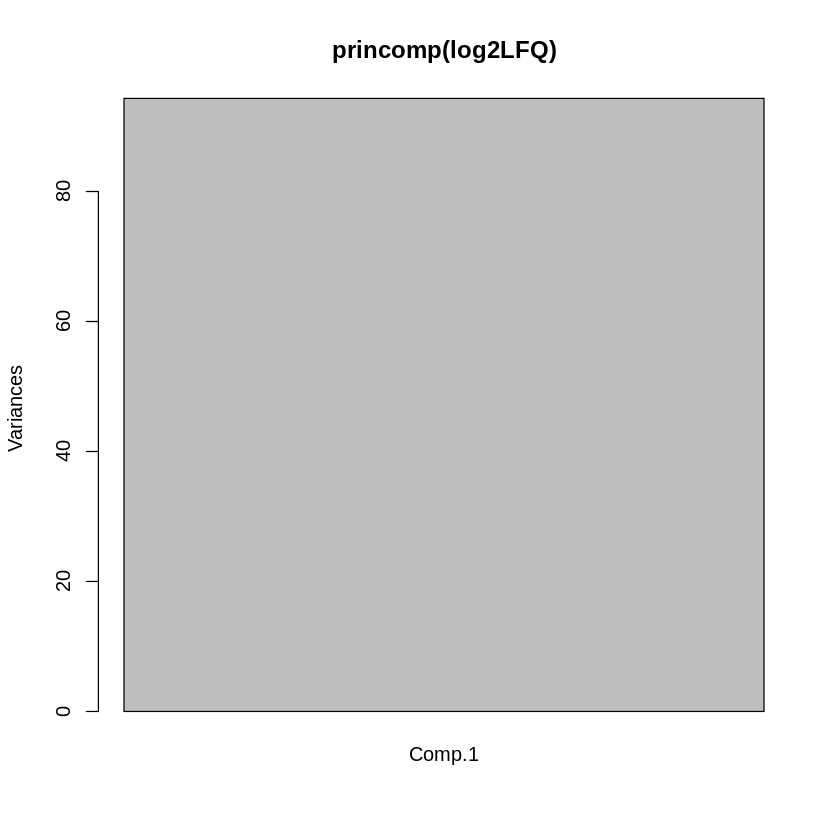

In [23]:
#plot
outP<-paste(inpF,selection,"pdf",sep = ".")
#pdf(outP)
for(i in 1:dim(log2LFQ)[2]){
  log2lfq <- hist(log2LFQ[,i],xlab=colnames(log2LFQ)[i],breaks=max(log2LFQ))
}
#pca
plot(princomp(log2LFQ))
biplot(prcomp(log2LFQ))
heatmap(log2LFQ)

[1] "Imputation constant: 21.3781522234897"


 .16_Strandbakken_test_20_191017111331 .24_Sandbakken_test_emulsjon_1
 Min.   :20.00                         Min.   :17.95                 
 1st Qu.:25.26                         1st Qu.:25.29                 
 Median :27.18                         Median :27.27                 
 Mean   :27.17                         Mean   :27.19                 
 3rd Qu.:29.32                         3rd Qu.:29.42                 
 Max.   :38.11                         Max.   :38.32                 
 .24_Sandbakken_test_emulsjon_2
 Min.   :18.93                 
 1st Qu.:25.27                 
 Median :27.16                 
 Mean   :27.19                 
 3rd Qu.:29.25                 
 Max.   :37.88                 

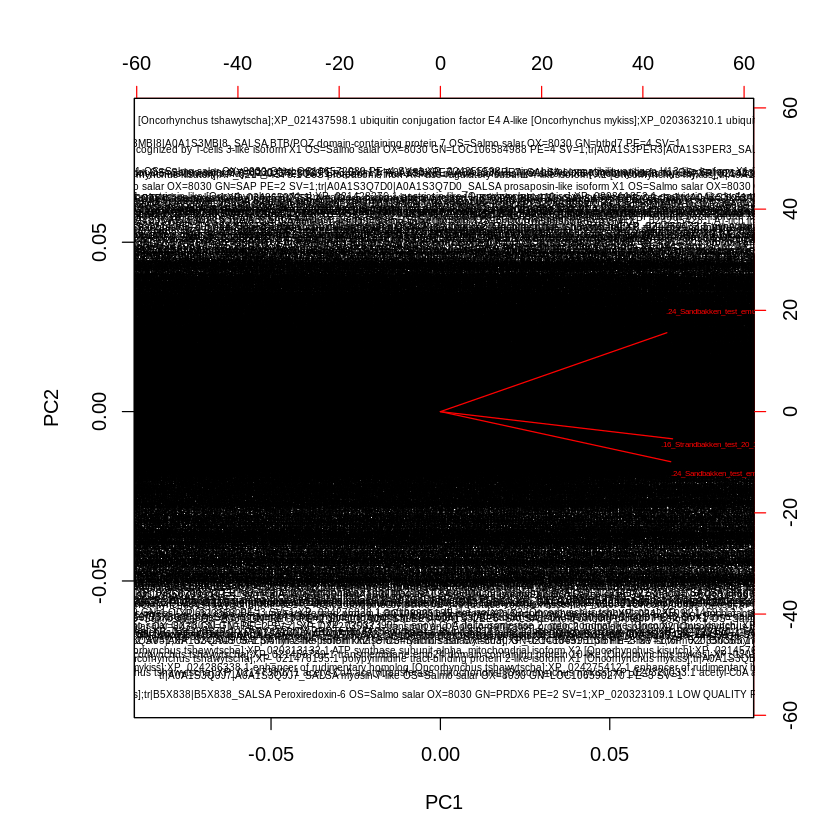

[1] "Histogram, PCA, Heatmap of Log2 transform of LFQ.intensity column(s) written to /home/ash022/promec/Qexactive/LARS/2019/oktober/Strandbakken/combined/txt/proteinGroups.txt.LFQ.intensity.pdf"


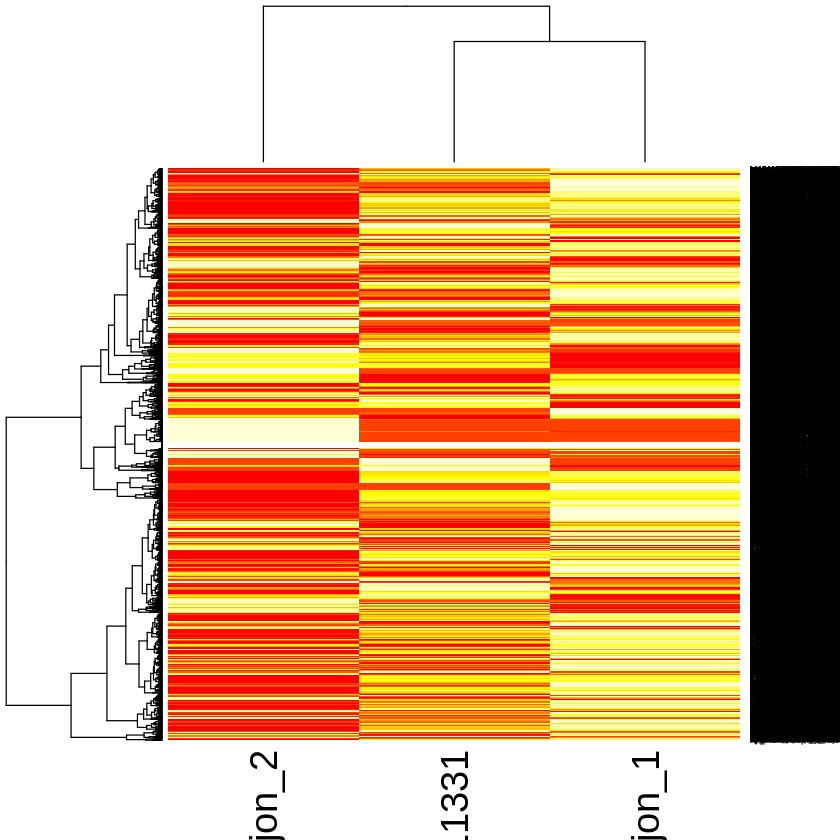

In [6]:
#impute-plot
scale=4
set.seed(scale)
imputeConst<-rnorm(1,mean=mean(log2LFQ)-scale,sd=sd(log2LFQ)/scale)
print(paste("Imputation constant:",imputeConst))
log2LFQ[log2LFQ==0]<-imputeConst
summary(log2LFQ)
#plot(princomp(log2LFQ),main=imputeConst)
biplot(prcomp(as.matrix(log2LFQ),scale=TRUE),cex=c(0.5, 0.4), xlab=NULL,arrow.len = 0)
heatmap(log2LFQ, scale = "row")
#dev.off()
print(paste("Histogram, PCA, Heatmap of Log2 transform of",selection,"column(s) written to",outP))

 .16_Strandbakken_test_20_191017111331 .24_Sandbakken_test_emulsjon_1
 Min.   :27.51                         Min.   :26.26                 
 1st Qu.:28.75                         1st Qu.:29.05                 
 Median :29.82                         Median :29.98                 
 Mean   :30.01                         Mean   :30.08                 
 3rd Qu.:30.94                         3rd Qu.:31.24                 
 Max.   :34.20                         Max.   :34.37                 
 .24_Sandbakken_test_emulsjon_2
 Min.   :26.62                 
 1st Qu.:28.56                 
 Median :29.61                 
 Mean   :29.71                 
 3rd Qu.:30.81                 
 Max.   :33.70                 

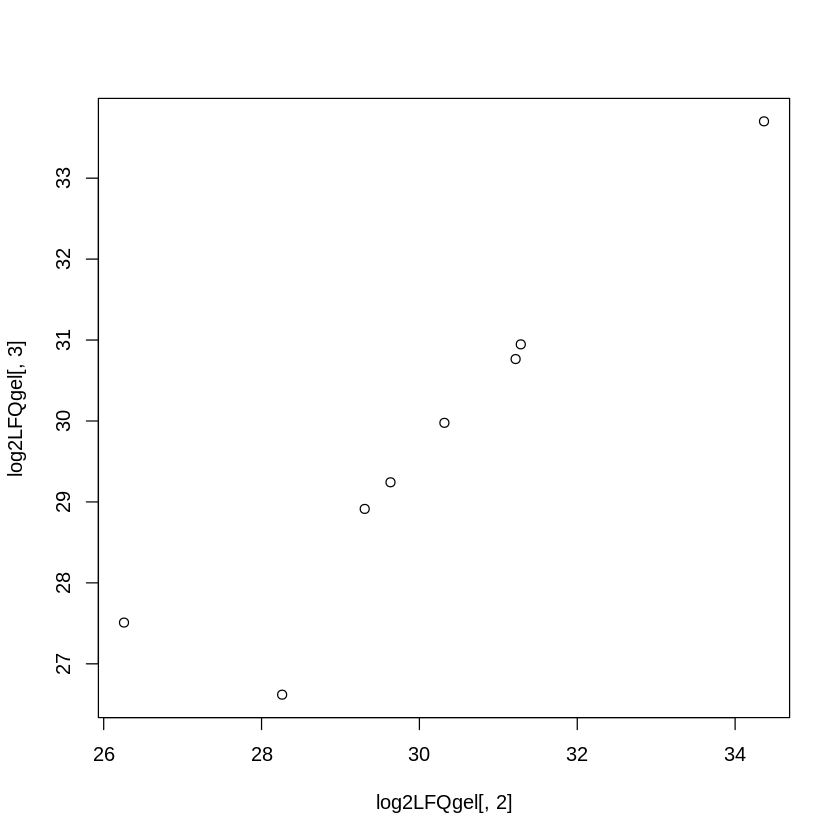

In [13]:
log2LFQgel<-log2LFQ[grep("gel",row.names(log2LFQ),ignore.case = TRUE),]
summary(log2LFQgel)
#(as.matrix(data[grep("gel",rodata),]))
plot(log2LFQgel[,2],log2LFQgel[,3])

 .16_Strandbakken_test_20_191017111331 .24_Sandbakken_test_emulsjon_1
 Min.   :21.38                         Min.   :21.38                 
 1st Qu.:25.11                         1st Qu.:25.27                 
 Median :28.10                         Median :27.94                 
 Mean   :28.15                         Mean   :28.19                 
 3rd Qu.:31.39                         3rd Qu.:31.44                 
 Max.   :35.61                         Max.   :35.51                 
 .24_Sandbakken_test_emulsjon_2
 Min.   :21.38                 
 1st Qu.:25.86                 
 Median :28.51                 
 Mean   :28.68                 
 3rd Qu.:31.65                 
 Max.   :35.31                 

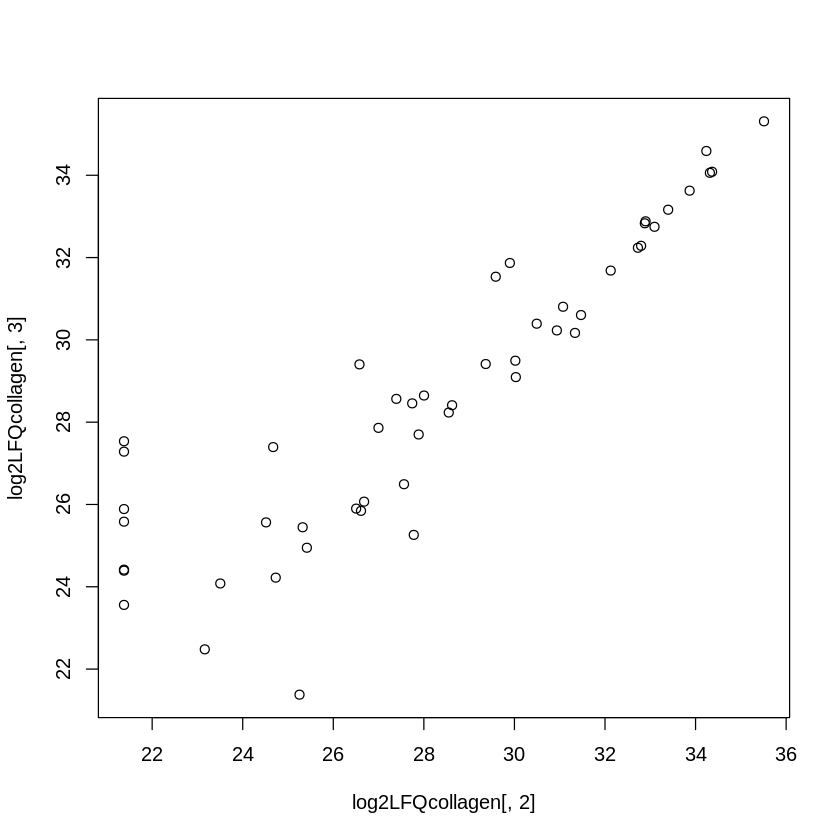

In [14]:
log2LFQcollagen<-log2LFQ[grep("collagen",row.names(log2LFQ),ignore.case = TRUE),]
summary(log2LFQcollagen)
plot(log2LFQcollagen[,2],log2LFQcollagen[,3])